# Objectives
* Building model using KNN, finding the best k and accuracy evaluation (7 marks)
* Building model using Decision Tree and find the accuracy evaluation (6 marks)
* Building model using SVM and find the accuracy evaluation (6 marks)
* Building model using Logistic Regression and find the accuracy evaluation (6 marks)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math  import sqrt
%matplotlib inline

In [2]:
df = pd.read_csv('loan_train.csv')
df

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off or in collection                                           |
| Principal      | Basic principal (initial) loan amount at the                                          |
| Terms          | Origination terms which can be weekly = (7 days), biweekly = (15), and monthly payoff = (30) schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant            

# Exploratory Data Analysis

In [3]:
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1'])
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male


Check dataset for any null values

In [4]:
# No missing values seem to be present
np.where(df.isnull() == True)

(array([], dtype=int64), array([], dtype=int64))

Seems only about 1/3 of people had their loan sent to collections.

In [5]:
# How many paid off to not paid off?
df.loan_status.value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

There are five different kinds of principal loans with $1000 being the most popular.

In [6]:
df.Principal.value_counts()

1000    258
800      81
300       3
900       2
500       2
Name: Principal, dtype: int64

Most loans taken out have been from men.

In [7]:
df.Gender.value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [8]:
# converting dates to appropriate date-time objects
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


Most loans are taken out by people who are either currently in college or in high school.
Given that the youngest age in our dataset is 18 years old we can make a reasonable assumption 
that these are recent college graduates and have taken out loans in order to pay for their first year of college.

### Education Distributions

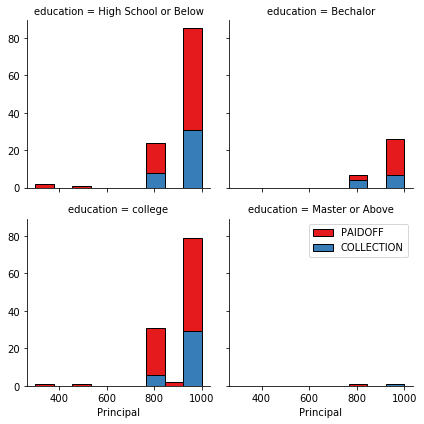

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="education", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Gender Distributions

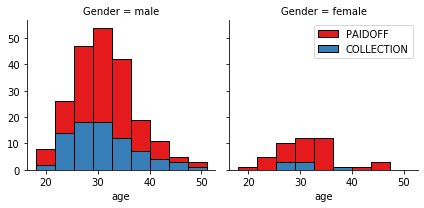

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### Age distributions

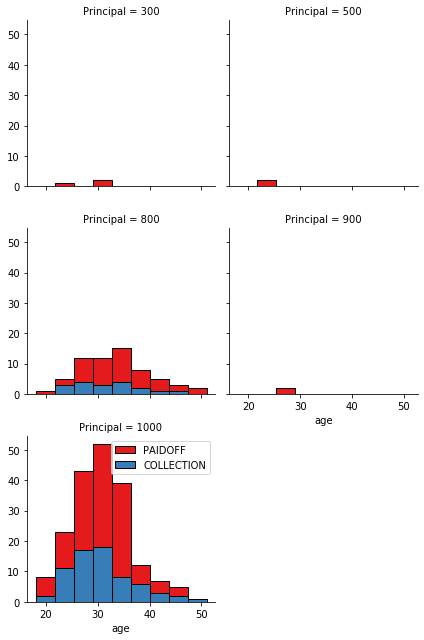

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Principal", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

In [12]:
# create column that denotes dates with day of the week (0-6) of EFFECTIVE DATE
df['day_of_week'] = df['effective_date'].dt.dayofweek
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4
...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0


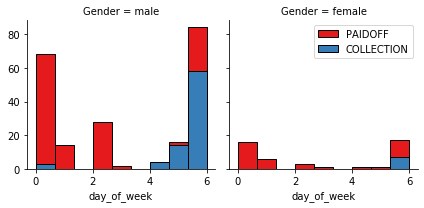

In [13]:
# plot loans vs DOW
bins = np.linspace(df.day_of_week.min(), df.day_of_week.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'day_of_week', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We will

In [14]:
# create weekend column where it encodes weekend days (4-6) as 1 and weekdays as 0
df['weekend'] = df['day_of_week'].apply(lambda x: 1 if (x>3)  else 0)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,6,1
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,6,1
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0,0


## Feature Engineering

In [15]:
# one-hot encode gender where male = 1, female = 0
df['Gender'].replace(to_replace=['male','female'], value = [1,0], inplace=True)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week,weekend
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1
...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,1,6,1
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,1,6,1
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,1,0,0
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,1,0,0


Let's look at the the attributes accosiated with Gender
--> 86% of women pay off their loan vs 73% of men

In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
0       PAIDOFF        0.865385
        COLLECTION     0.134615
1       PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

What about education? --> BS = 75% ; HS = 74% ; College = 76% ; Graduate = 50%

In [17]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### lets set out a data frame that will include our feature selection for our model

* Education
* Gender
* Weekend
* terms
* Principal
* Age

We first have to encode our education column into three seperate columns since we have 4 criteria for that data:

In [18]:
# use pd.get_dummies to get the different data labels in education column and creat individual 
# seperate columns indicating the indices they are located at = 1
df = pd.concat([df,pd.get_dummies(df['education'])], axis=1)
df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week,weekend,Bechalor,High School or Below,Master or Above,college
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0,0,1,0,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0,1,0,0,0
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0,0,0,0,1
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1,0,0,0,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,1,6,1,0,1,0,0
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,1,6,1,0,1,0,0
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,1,0,0,0,0,0,1
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,1,0,0,0,0,0,1


In [19]:
features = df[['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college']]
features

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,1,1,0,1,0
342,1000,30,25,1,1,0,1,0
343,800,15,39,1,0,0,0,1
344,1000,30,28,1,0,0,0,1


In [20]:
X = features
X

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,1,0,0,1,0
1,1000,30,33,0,0,1,0,0
2,1000,15,27,1,0,0,0,1
3,1000,30,28,0,1,0,0,1
4,1000,30,29,1,1,0,0,1
...,...,...,...,...,...,...,...,...
341,800,15,32,1,1,0,1,0
342,1000,30,25,1,1,0,1,0
343,800,15,39,1,0,0,0,1
344,1000,30,28,1,0,0,0,1


We are using our selected features as independent variables that might impact the result loan status of a customer 
So we will use the 'loan_status' from our main dataframe as the dependent variable and test how different models fit the relationship.

In [21]:
# Convert loan_status dataframe column into a 1xN numpy array
y = df['loan_status'].values
y[0:10]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

## Normalize Data/Pre-process for modeling

In [22]:
from sklearn import preprocessing

In [23]:
# normalize feature data
X = preprocessing.StandardScaler().fit(X).transform(X)
X

array([[ 0.51578458,  0.92071769,  2.33152555, ..., -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148, ...,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, ..., -0.38170062,
        -0.87997669,  1.14984679],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188, ..., -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.81902922, ..., -0.38170062,
        -0.87997669,  1.14984679]])

## Classification
#### We will use the following ML algorithms to evaluate the best model
*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

# <B> K Nearest Neighbor(KNN)

In [24]:
# train/test split mutually exclusive
from sklearn.model_selection import train_test_split
# X = independent variables, y = dependent variable
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
# come back after evaluating all K iterations to update with best K
k = 7
#Train Model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [27]:
# Prediction
yhat = neigh.predict(X_test)
yhat

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

In [28]:
# predict Train set
y_hat_train = neigh.predict(X_train)
y_hat_train

array(['PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF',

In [29]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, y_hat_train))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8079710144927537
Test set Accuracy:  0.7857142857142857


In [30]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       ])

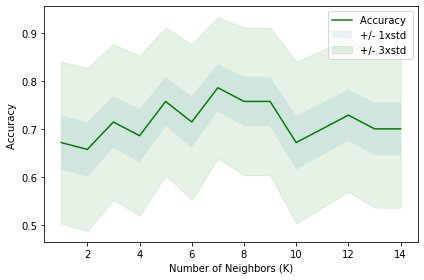

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')

# 1-standard deviation error
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
# 3- standard deviation error
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")

plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

#### Looks like K=7 will be our most accurate fit for the model

In [32]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


### Evaluation

#### Jaccard Score & F1 Score

In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [34]:
print("Jaccard Score: ", jaccard_score(y_test, yhat, average='weighted'))
print("F1 Score: ", f1_score(y_test, yhat, average='weighted'))

Jaccard Score:  0.5730769230769232
F1 Score:  0.7034625628884287


## <b> Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier

Setting up Decision tree model with it's criterion and parameters.

In [36]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

#### Train model

Now we will fit the data with the training feature matrix: X_train and training response vector : y_train


In [37]:
Tree_trained = Tree.fit(X_train,y_train)
Tree_trained

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Lets take a look how well the model was trained by using the TEST data on our trained model.

#### Predict

In [38]:
Tree_test = Tree_trained.predict(X_test)

In [39]:
print(Tree_test [0:10])
print(y_test [0:10])

['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


Seems like it did not do very well but let us evaluate it to make sure.

#### Evaluation

In [40]:
from sklearn import metrics

In [41]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, Tree_test))

DecisionTrees's Accuracy:  0.6142857142857143


Looks like it performed worse than KNN model so this is not a very good model. Lets test out some other models.

## <b> Vector Support Machines

#### Train

Import SVM and train the model with our training data

In [42]:
from sklearn import svm
# kernel = '' lets use pick the kernel function
svm_ = svm.SVC(kernel='rbf')
svm_.fit(X_train, y_train) 

SVC()

#### Predict

Test how well the trained SVM model performs using our test dataset X_test

In [43]:
# Test model
svm_predict = svm_.predict(X_test)
print(svm_predict [0:10])
print(y_test [0:10])

['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


#### Evaluation

Evaluating using <b> f1 Score criterion

In [44]:
from sklearn.metrics import f1_score
print("f1 score accuracy: ",f1_score(y_test, svm_predict, average='weighted'))

f1 score accuracy:  0.7275882012724117


Evaluating using <b> Jaccard Score criterion

In [45]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, svm_predict, average='weighted')

0.6103896103896104

## <b> Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

#### Train

In [47]:
# Build model
logR = LogisticRegression(C=0.02, solver = 'liblinear')
# train model
logR_train = logR.fit(X_train, y_train)

#### Test

In [48]:
# Prediction
logR_test = logR_train.predict(X_test)
logR_test

array(['COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [49]:
# Calculate the probabilties of each of the predicted values from our logR_train model 
# predict_proba gives the probability of a value being 0 and 1 as a list
logR_testprob = logR_train.predict_proba(X_test)
logR_testprob

array([[0.50350612, 0.49649388],
       [0.43392555, 0.56607445],
       [0.23371623, 0.76628377],
       [0.27142253, 0.72857747],
       [0.24248315, 0.75751685],
       [0.24475835, 0.75524165],
       [0.48076123, 0.51923877],
       [0.46563636, 0.53436364],
       [0.27142253, 0.72857747],
       [0.48808333, 0.51191667],
       [0.26546464, 0.73453536],
       [0.48856361, 0.51143639],
       [0.17380631, 0.82619369],
       [0.27425351, 0.72574649],
       [0.4092327 , 0.5907673 ],
       [0.17722658, 0.82277342],
       [0.53379385, 0.46620615],
       [0.22582221, 0.77417779],
       [0.49614651, 0.50385349],
       [0.24511384, 0.75488616],
       [0.4114238 , 0.5885762 ],
       [0.48477392, 0.51522608],
       [0.51866713, 0.48133287],
       [0.45964358, 0.54035642],
       [0.37269235, 0.62730765],
       [0.51108918, 0.48891082],
       [0.51487901, 0.48512099],
       [0.32836072, 0.67163928],
       [0.49993884, 0.50006116],
       [0.16727545, 0.83272455],
       [0.

Evaluating using <b> f1 Score criterion and <b> Jaccard Score criterion

In [50]:
print("Jaccard Score: ", jaccard_score(y_test, logR_test, average='weighted'))
print("F1 Score: ", f1_score(y_test, logR_test, average='weighted'))

Jaccard Score:  0.5865846338535414
F1 Score:  0.6953867388649997


# Model Reports
### Using test data set

In [51]:
!curl -l -o loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3642  100  3642    0     0   1087      0  0:00:03  0:00:03 --:--:--  1087


In [52]:
test_df = pd.read_csv('loan_test.csv')
print(test_df.shape)
test_df.head()

(54, 10)


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


Pretty small data set here.

#### Re-processing data

In [53]:
# converting dates to appropriate date-time objects
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
# create column that denotes dates with day of the week (0-6) of EFFECTIVE DATE
test_df['day_of_week'] = test_df['effective_date'].dt.dayofweek
# create column that makes weekdays = 0 and weekends =  1
test_df['weekend'] = test_df['day_of_week'].apply(lambda x: 1 if (x>3)  else 0)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male,6,1


In [54]:
# one-hot encode gender where male = 1, female = 0
test_df['Gender'].replace(to_replace=['male','female'], value = [1,0], inplace=True)
test_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
# use pd.get_dummies to get the different data labels in education column and creat individual 
# seperate columns indicating the indices they are located at = 1
test_df = pd.concat([test_df,pd.get_dummies(test_df['education'])], axis=1)
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,day_of_week,weekend,Bechalor,High School or Below,Master or Above,college
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,0,3,0,1,0,0,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,1,4,1,0,0,1,0
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,0,5,1,0,1,0,0
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,1,5,1,0,0,0,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,1,6,1,1,0,0,0


In [64]:
test_features = test_df[['Principal','terms','age','Gender','weekend','Bechalor','High School or Below','college']]
test_features.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,0,0,1,0,0
1,300,7,35,1,1,0,0,0
2,1000,30,43,0,1,0,1,0
3,1000,30,26,1,1,0,0,1
4,800,15,29,1,1,1,0,0


In [65]:
y_ = test_df['loan_status'].values
y_.shape

(54,)

In [66]:
# normalize feature data
test_features = preprocessing.StandardScaler().fit(test_features).transform(test_features)
test_features.shape

(54, 8)

In [67]:
# Arrays to store the result
jacc = np.full(4, np.nan)
F1 = np.full(4, np.nan)
Logloss = np.full(4, np.nan)
model = np.array(4)
model = ["KNN", "Decision Tree", "SVM", "LogisticRegression"]

### Jaccard Scores

In [68]:
jacc[0]=jaccard_score(y_, neigh.predict(test_features), average='weighted')
jacc[1]=jaccard_score(y_, Tree.predict(test_features), average='weighted')
jacc[2]=jaccard_score(y_, svm_.predict(test_features), average='weighted')
jacc[3]=jaccard_score(y_, logR.predict(test_features), average='weighted')
jacc

array([0.53271605, 0.59191919, 0.64691358, 0.56235733])

### F1-Scores

In [69]:
#F1 Score

F1[0]=f1_score(y_, neigh.predict(test_features), average='weighted')
F1[1] = f1_score(y_, Tree.predict(test_features), average='weighted')
F1[2] = f1_score(y_, svm_.predict(test_features), average='weighted')
F1[3] = f1_score(y_, logR.predict(test_features), average='weighted')
F1

array([0.66022544, 0.73668189, 0.75835031, 0.66042673])

In [70]:
# Log Loss
from sklearn.metrics import log_loss

In [71]:
Logloss[3] = log_loss(y_, logR.predict_proba(test_features))

In [72]:
Model_results = pd.DataFrame({'Jaccard Score': jacc, 'F1-Score': F1, 'LogLoss-Score': Logloss}, index = ['KNN','Decision Tree','SVM','Log Regression'])
Model_results

,Jaccard Score,F1-Score,LogLoss-Score
KNN,0.532716,0.660225,NaN
Decision Tree,0.591919,0.736682,NaN
SVM,0.646914,0.758350,NaN
Log Regression,0.562357,0.660427,0.529073
